In [328]:
# Importing Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns


In [329]:
# Getting Data (This is training data)
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-09-26 08:48:22--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0s      

2019-09-26 08:48:23 (120 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [330]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


Don't know what Unnamed: 0 and Unnamed:0.1 corresponds to so dropping the first two columns

In [331]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],inplace=True,axis=1)

In [332]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null object
due_date          346 non-null object
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: int64(3), object(5)
memory usage: 21.7+ KB


In [334]:
df.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


In [335]:
df.education.value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [336]:
df.loan_status.value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

86 of those haven't paid off the loan

In [337]:
#Assigning Label of 1 to those who have paid off the loan
df.loan_status = (df.loan_status == 'PAIDOFF').astype(int)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,1,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,1,1000,15,9/8/2016,9/22/2016,27,college,male
3,1,1000,30,9/9/2016,10/8/2016,28,college,female
4,1,1000,30,9/9/2016,10/8/2016,29,college,male


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
loan_status       346 non-null int64
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null object
due_date          346 non-null object
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: int64(4), object(4)
memory usage: 21.7+ KB


In [339]:
# Changing the gender as well with 1 for male, and 0 for female
df.Gender = (df.Gender=='male').astype(int)

In [340]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1000,30,9/8/2016,10/7/2016,45,High School or Below,1
1,1,1000,30,9/8/2016,10/7/2016,33,Bechalor,0
2,1,1000,15,9/8/2016,9/22/2016,27,college,1
3,1,1000,30,9/9/2016,10/8/2016,28,college,0
4,1,1000,30,9/9/2016,10/8/2016,29,college,1


In [341]:
#changing the date time to proper format
df.effective_date = pd.to_datetime(df.effective_date)
df.due_date = pd.to_datetime(df.due_date)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
loan_status       346 non-null int64
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null datetime64[ns]
due_date          346 non-null datetime64[ns]
age               346 non-null int64
education         346 non-null object
Gender            346 non-null int64
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 21.7+ KB


In [343]:
#Converting Education to levels i.e., doing hot encoding
df1 = pd.get_dummies(df.education,prefix='edu')

In [344]:
Input_FeaturesA = df[['Principal','terms','age','Gender']]

In [345]:
Features = pd.concat([Input_FeaturesA,df1],axis=1)

In [346]:
#We dropped Effective and due date, but this can be incorporated via adding another column by combining effective and due date
h = (df.due_date-df.effective_date)
Features['Days_Allowed']= h.dt.days
Features.head()

,Principal,terms,age,Gender,edu_Bechalor,edu_High School or Below,edu_Master or Above,edu_college,Days_Allowed
0,1000,30,45,1,0,1,0,0,29
1,1000,30,33,0,1,0,0,0,29
2,1000,15,27,1,0,0,0,1,14
3,1000,30,28,0,0,0,0,1,29
4,1000,30,29,1,0,0,0,1,29


In [347]:
labels = df['loan_status']

In [348]:
X_train = preprocessing.StandardScaler().fit(Features).transform(Features)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [349]:
X_train[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555,  0.42056004, -0.38170062,
         1.13639374, -0.07624929, -0.86968108,  0.53257725],
       [ 0.51578458,  0.92071769,  0.34170148, -2.37778177,  2.61985426,
        -0.87997669, -0.07624929, -0.86968108,  0.53257725],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42056004, -0.38170062,
        -0.87997669, -0.07624929,  1.14984679, -0.88417105],
       [ 0.51578458,  0.92071769, -0.48739188, -2.37778177, -0.38170062,
        -0.87997669, -0.07624929,  1.14984679,  0.53257725],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.42056004, -0.38170062,
        -0.87997669, -0.07624929,  1.14984679,  0.53257725]])

In [350]:
y_train = np.asanyarray(labels)

## Getting and Cleaning Testing Data 

In [351]:
# Getting data for testing
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-09-26 08:48:24--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-09-26 08:48:24 (347 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [352]:
test_data = pd.read_csv('loan_test.csv')

In [353]:
test_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [354]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
Unnamed: 0        54 non-null int64
Unnamed: 0.1      54 non-null int64
loan_status       54 non-null object
Principal         54 non-null int64
terms             54 non-null int64
effective_date    54 non-null object
due_date          54 non-null object
age               54 non-null int64
education         54 non-null object
Gender            54 non-null object
dtypes: int64(5), object(5)
memory usage: 4.3+ KB


In [355]:
#Cleaning the test data
test_data.drop(['Unnamed: 0','Unnamed: 0.1'],inplace=True,axis=1)

In [356]:
test_data.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [357]:
test_data.effective_date = pd.to_datetime(test_data.effective_date)
test_data.due_date = pd.to_datetime(test_data.due_date)

In [358]:
test_data_edu = pd.get_dummies(test_data.education,prefix='edu')

In [359]:
test_data_edu.head()

,edu_Bechalor,edu_High School or Below,edu_Master or Above,edu_college
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,1,0,0,0


In [360]:
test_data.shape

(54, 8)

In [361]:
test_data.Gender = (test_data.Gender=='male').astype(int)

In [362]:
test_data.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,0
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,1
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,0
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,1
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,1


In [363]:
test_data.loan_status = (test_data.loan_status == 'PAIDOFF').astype(int)

In [364]:
test_data.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1000,30,2016-09-08,2016-10-07,50,Bechalor,0
1,1,300,7,2016-09-09,2016-09-15,35,Master or Above,1
2,1,1000,30,2016-09-10,2016-10-09,43,High School or Below,0
3,1,1000,30,2016-09-10,2016-10-09,26,college,1
4,1,800,15,2016-09-11,2016-09-25,29,Bechalor,1


In [365]:
t = (test_data.due_date - test_data.effective_date).dt.days
t.head()

0    29
1     6
2    29
3    29
4    14
dtype: int64

In [366]:
test_data.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1000,30,2016-09-08,2016-10-07,50,Bechalor,0
1,1,300,7,2016-09-09,2016-09-15,35,Master or Above,1
2,1,1000,30,2016-09-10,2016-10-09,43,High School or Below,0
3,1,1000,30,2016-09-10,2016-10-09,26,college,1
4,1,800,15,2016-09-11,2016-09-25,29,Bechalor,1


In [367]:
test_data.drop(['effective_date','due_date','education'],axis=1,inplace=True)

In [368]:
test_data.head()

,loan_status,Principal,terms,age,Gender
0,1,1000,30,50,0
1,1,300,7,35,1
2,1,1000,30,43,0
3,1,1000,30,26,1
4,1,800,15,29,1


In [369]:
y_test = np.asanyarray(test_data.loan_status)

In [370]:
test_Features = pd.concat([test_data[['Principal','terms','age','Gender']] , test_data_edu],axis=1)

In [371]:
test_Features.head()

,Principal,terms,age,Gender,edu_Bechalor,edu_High School or Below,edu_Master or Above,edu_college
0,1000,30,50,0,1,0,0,0
1,300,7,35,1,0,0,1,0
2,1000,30,43,0,0,1,0,0
3,1000,30,26,1,0,0,0,1
4,800,15,29,1,1,0,0,0


In [372]:
test_Features['Days_Allowed'] = t

In [373]:
test_Features.head()

,Principal,terms,age,Gender,edu_Bechalor,edu_High School or Below,edu_Master or Above,edu_college,Days_Allowed
0,1000,30,50,0,1,0,0,0,29
1,300,7,35,1,0,0,1,0,6
2,1000,30,43,0,0,1,0,0,29
3,1000,30,26,1,0,0,0,1,29
4,800,15,29,1,1,0,0,0,14


In [374]:
Features.head()

,Principal,terms,age,Gender,edu_Bechalor,edu_High School or Below,edu_Master or Above,edu_college,Days_Allowed
0,1000,30,45,1,0,1,0,0,29
1,1000,30,33,0,1,0,0,0,29
2,1000,15,27,1,0,0,0,1,14
3,1000,30,28,0,0,0,0,1,29
4,1000,30,29,1,0,0,0,1,29


In [375]:
X_test = preprocessing.StandardScaler().fit(test_Features).transform(test_Features)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [376]:
X_test[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865, -1.97714211,  2.39791576,
        -0.79772404, -0.19611614, -0.86135677,  0.44858772],
       [-3.56269116, -1.70427745,  0.53336288,  0.50578054, -0.41702883,
        -0.79772404,  5.09901951, -0.86135677, -1.39017777],
       [ 0.49362588,  0.92844966,  1.88080596, -1.97714211, -0.41702883,
         1.25356634, -0.19611614, -0.86135677,  0.44858772],
       [ 0.49362588,  0.92844966, -0.98251057,  0.50578054, -0.41702883,
        -0.79772404, -0.19611614,  1.16095912,  0.44858772],
       [-0.66532184, -0.78854628, -0.47721942,  0.50578054,  2.39791576,
        -0.79772404, -0.19611614, -0.86135677, -0.75060717]])

## K Nearest Neighbor Algorithm 

In [377]:
# Importing Required Libraries
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

# Importing Evaluation Metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score


In [378]:
neigh = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)

In [379]:
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [380]:
Yhat = neigh.predict(X_test)

In [381]:
KNN_Jacarrd = jaccard_similarity_score(y_test,Yhat,normalize=True)
print('KNN Jaccard Similarity Score (Normalized) = %.2f'%KNN_Jacarrd)

KNN Jaccard Similarity Score (Normalized) = 0.67


In [382]:
KNN_f1= f1_score(y_test,Yhat)
print('KNN f1 Score = %.2f'%KNN_f1)

KNN f1 Score = 0.79


Finding the best value of k

In [383]:
KNN_Jaccard = [];
KNN_f1 = [];
for k in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    Yhat = neigh.predict(X_test)
    KNN_Jaccard.append(jaccard_similarity_score(y_test,Yhat,normalize=True))
    KNN_f1.append( f1_score(y_test,Yhat))

print('Jaccard Score Maximum at k = ',pd.Series(KNN_Jaccard).idxmax()+1, 'which is ',KNN_Jaccard[pd.Series(KNN_Jaccard).idxmax()]  )
print('F1 Score Maximum at k = ',pd.Series(KNN_f1).idxmax()+1, 'which is ', KNN_f1[pd.Series(KNN_f1).idxmax()] )    


Jaccard Score Maximum at k =  11 which is  0.7407407407407407
F1 Score Maximum at k =  11 which is  0.851063829787234


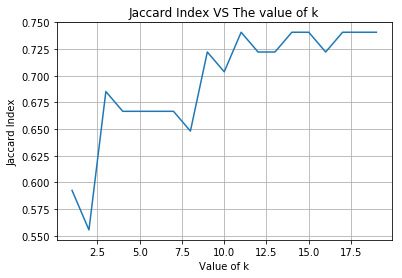

In [384]:
plt.plot(range(1,20),KNN_Jaccard)
plt.xlabel('Value of k')
plt.ylabel('Jaccard Index')
plt.title('Jaccard Index VS The value of k')
plt.grid()

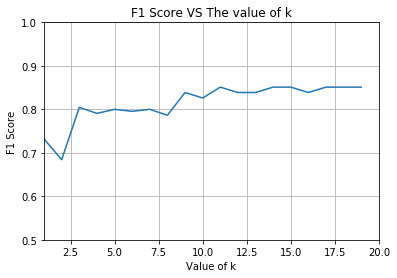

In [385]:
plt.plot(range(1,20),KNN_f1)
plt.xlabel('Value of k')
plt.ylabel('F1 Score')
plt.title('F1 Score VS The value of k')
plt.axis([1, 20, 0.5, 1])
plt.grid()

## Decission Tree Classifier

In [386]:
# Importing Required Libraries and Classifiers
from sklearn.tree import DecisionTreeClassifier


In [387]:
DTree = DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [388]:
DTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [389]:
DTree_Yhat = DTree.predict(X_test)

In [390]:
DTree_Jaccard = jaccard_similarity_score(y_test,DTree_Yhat)
DTree_Jaccard

0.6666666666666666

In [391]:
#Finding the Optimal Value of k

DTree_Jaccard = [];
DTree_f1 = [];
for k in range(1,20):
    DTree = DecisionTreeClassifier(criterion='entropy',max_depth=k).fit(X_train,y_train)
    DTree_Yhat = DTree.predict(X_test)
    DTree_Jaccard.append(jaccard_similarity_score(y_test,DTree_Yhat,normalize=True))
    DTree_f1.append( f1_score(y_test,DTree_Yhat))
DTree_Jaccard_k = pd.Series(DTree_Jaccard).idxmax()+1
DTree_f1_k = pd.Series(DTree_f1).idxmax()+1
print('Jaccard Score Maximum score is',DTree_Jaccard[DTree_Jaccard_k],'at k = ',DTree_Jaccard_k )
print('F1 Score Maximum is',DTree_f1[DTree_f1_k], 'at k = ',DTree_f1_k)  

Jaccard Score Maximum score is 0.7407407407407407 at k =  1
F1 Score Maximum is 0.851063829787234 at k =  1


## Implementing SVM

In [392]:
# Importing required Libraries
from sklearn import svm

In [393]:
# Defining Various Kernels
SVM_Kernels = ['rbf','linear','poly','sigmoid']

In [394]:
SVM_Object = svm.SVC(kernel = SVM_Kernels[0])
SVM_Object.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [395]:
SVM_Yhat= SVM_Object.predict(X_test)

In [396]:
SVM_Jaccard = jaccard_similarity_score(y_test,SVM_Yhat)
SVM_Jaccard

0.7407407407407407

In [397]:
#Finding the Optimal Kernel

SVM_Jaccard = [];
SVM_f1 = [];
for ker in SVM_Kernels:
    SVM_Object = svm.SVC(kernel = ker)
    SVM_Object.fit(X_train,y_train)
    SVM_Yhat= SVM_Object.predict(X_test)
    SVM_Jaccard.append(jaccard_similarity_score(y_test,SVM_Yhat))
    SVM_f1.append( f1_score(y_test,SVM_Yhat))
    
SVM_Jaccard_k = pd.Series(SVM_Jaccard).idxmax()+1
SVM_f1_k = pd.Series(SVM_f1).idxmax()+1
print('Jaccard Score Maximum score is',SVM_Jaccard[SVM_Jaccard_k],'with kernel = ',SVM_Kernels[DTree_Jaccard_k] )
print('F1 Score Maximum is',SVM_f1[SVM_f1_k], ' with kernel = ',SVM_Kernels[SVM_f1_k]) 

Jaccard Score Maximum score is 0.7407407407407407 with kernel =  linear
F1 Score Maximum is 0.851063829787234  with kernel =  linear


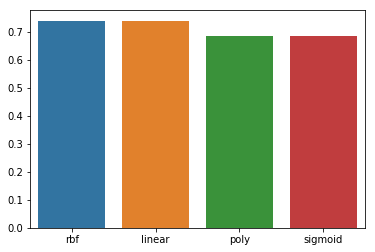

In [398]:
ax=sns.barplot(x=SVM_Kernels,y=SVM_Jaccard)

## Implementing Logistic Regression

In [399]:
#Importing Required Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [400]:
LR_Object = LogisticRegression(C=0.1, solver='lbfgs').fit(X_train,y_train)
LR_Yhat= LR_Object.predict(X_test)
LR_Jaccard = jaccard_similarity_score(y_test,LR_Yhat)
LR_f1 = f1_score(y_test,LR_Yhat)
LR_f1
LR_YhatProb = LR_Object.predict_proba(X_test)
LR_log = log_loss(y_test,LR_YhatProb)
LR_log

0.5877687775574488

## Generating the Final Results based on the Working Above

In [401]:
Data = {'Optimal':
                 [pd.Series(KNN_Jaccard).idxmax()+1,DTree_Jaccard_k,SVM_Jaccard_k,'lbfgs'],
       'Jaccard Score':
                       [round(KNN_Jaccard[pd.Series(KNN_Jaccard).idxmax()],2),round(DTree_Jaccard[DTree_Jaccard_k],2),
                        round(SVM_Jaccard[SVM_Jaccard_k],2),round(LR_Jaccard,2)],
       'F1 Score':
                   [round(KNN_f1[pd.Series(KNN_f1).idxmax()],2),round(DTree_f1[DTree_f1_k],2),
                        round(SVM_f1[SVM_f1_k],2),round(LR_f1,2)],
       'LogLoss':
                   [np.nan,np.nan,np.nan,round(LR_log,2)]}

In [402]:
Final_result = pd.DataFrame(Data, index = ['KNN','DT','SVM','LR'])

In [403]:
Final_result

,Optimal,Jaccard Score,F1 Score,LogLoss
KNN,11,0.74,0.85,NaN
DT,1,0.74,0.85,NaN
SVM,1,0.74,0.85,NaN
LR,lbfgs,0.74,0.85,0.59
